In [2]:
import pandas as pd

In [3]:
#d = {'Source': [1,1,2,2,3,4,5,5,6], 'Target': [2, 3,5,6,4,5,1,6,4], 'Type': ['Undirected', 'Undirected']}

d = {'Source': [1,1,2,2,3,4,5,5], 'Target': [2, 3,5,6,4,5,1,6]}

In [4]:
df = pd.DataFrame(d)

In [5]:
df

,Source,Target
0,1,2
1,1,3
2,2,5
3,2,6
4,3,4
5,4,5
6,5,1
7,5,6


In [6]:
import networkx as nx

In [7]:
G = nx.from_pandas_edgelist(df,
                           source = 'Source',
                           target = 'Target')

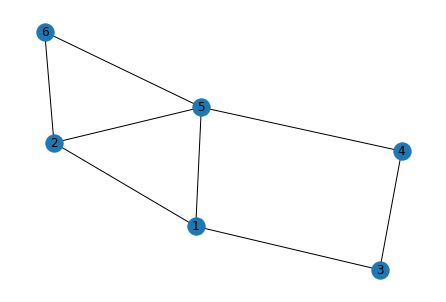

In [8]:
nx.draw(G, with_labels = True)

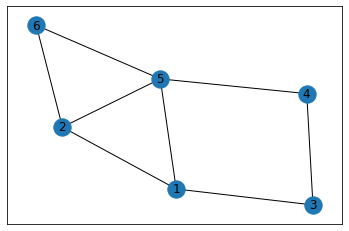

In [9]:
nx.draw_networkx(G, with_labels = True)

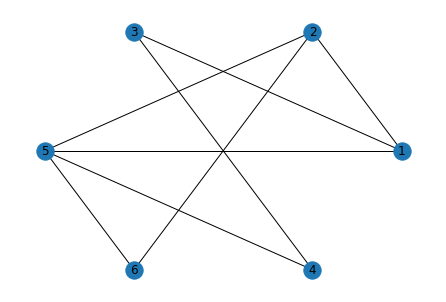

In [10]:
nx.draw_circular(G, with_labels = True)

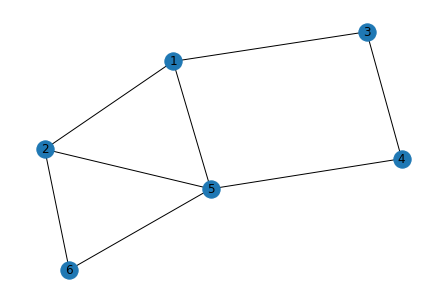

In [11]:
nx.draw_kamada_kawai(G, with_labels = True)

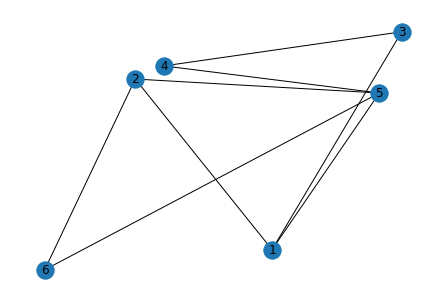

In [12]:
nx.draw_random(G, with_labels = True)

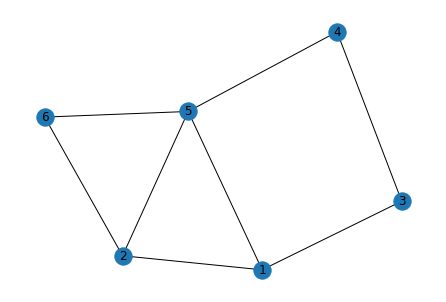

In [13]:
nx.draw_spring(G, with_labels = True)

In [14]:
# pip install pyvis

In [15]:
from pyvis.network import Network

In [16]:
net = Network(notebook = True)

In [17]:
net.from_nx(G)

In [18]:
net.show('example.html')

In [19]:
# from pyvis.network import Network
import pandas as pd

In [21]:
#bettor_df = pd.read_csv('/Users/freddielloyd/Documents/Uob Documents/DSP THESIS/data/network_structure.csv')

#bettor_df = pd.read_csv('AcrNetRP0.5_network_structure.csv')

#bettor_df = pd.read_csv('AcrNetRP0_network_structure.csv')

#bettor_df = pd.read_csv('AcrNetRP0.25_network_structure.csv')

bettor_df = pd.read_csv('AcrNetRP0.75_network_structure.csv')

In [22]:
bettor_df

,id,shuffled_id,bettor type,Number of Neighbours,Neighbours
0,0,0,Random,10,"[249, 245, 26, 84, 88, 98, 103, 131, 214, 219]"
1,1,1,Random,10,"[6, 24, 99, 44, 52, 65, 175, 177, 221, 236]"
2,2,2,Random,8,"[38, 47, 130, 140, 220, 227, 233, 235]"
3,3,3,Random,4,"[18, 104, 230, 233]"
4,4,4,Random,12,"[6, 25, 38, 50, 51, 156, 170, 176, 206, 215, 2..."
...,...,...,...,...,...
245,245,245,Priviledged,10,"[0, 247, 249, 52, 75, 120, 169, 196, 209, 241]"
246,246,246,Priviledged,6,"[248, 74, 150, 189, 219, 233]"
247,247,247,Priviledged,9,"[243, 245, 46, 121, 122, 146, 167, 174, 207]"
248,248,248,Priviledged,7,"[246, 70, 7, 68, 123, 127, 153]"


In [23]:
type(bettor_df['id'])

pandas.core.series.Series

In [24]:
bettor_df['color'] = ""
#bettor_df
for i in range(len(bettor_df)):
    if bettor_df['bettor type'][i] == 'Back_Favourite':
        bettor_df['color'][i] = 'blue'
    elif bettor_df['bettor type'][i] == 'Leader_Wins':
        bettor_df['color'][i] = 'turquoise'
    elif bettor_df['bettor type'][i] == 'Linex':
        bettor_df['color'][i] = 'red'
    elif bettor_df['bettor type'][i] == 'Priviledged':
        bettor_df['color'][i] = 'orange'
    elif bettor_df['bettor type'][i] == 'Random':
        bettor_df['color'][i] = 'green'
    elif bettor_df['bettor type'][i] == 'Underdog':
        bettor_df['color'][i] = 'yellow'
        
# bettor_df

/var/folders/vh/4g2kk1vs48v4x1jzrcb_11640000gn/T/ipykernel_4555/2917000622.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bettor_df['color'][i] = 'green'
/var/folders/vh/4g2kk1vs48v4x1jzrcb_11640000gn/T/ipykernel_4555/2917000622.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bettor_df['color'][i] = 'turquoise'
/var/folders/vh/4g2kk1vs48v4x1jzrcb_11640000gn/T/ipykernel_4555/2917000622.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [25]:
import json

json.loads(bettor_df['Neighbours'][0]) # to make a list from string representation of list

[249, 245, 26, 84, 88, 98, 103, 131, 214, 219]

In [26]:
import json

bettor_id = []
bettor_shuffled_id = []
neighbour = []
color = []

for i in range(len(bettor_df['Neighbours'])):
    bettor_neighbours = []
    temp_id = bettor_df['id'][i]
    temp_shuffled_id = bettor_df['shuffled_id'][i]
    temp_color = bettor_df['color'][i]
    bettor_neighbours = json.loads(bettor_df['Neighbours'][i])
    #print(type(bettor_neighbours))
    for j in range(len(bettor_neighbours)): 
        bettor_id.append(temp_id)
        bettor_shuffled_id.append(temp_shuffled_id)
        color.append(temp_color)
        neighbour.append(bettor_neighbours[j])
        
temp_dict = {'id': bettor_id, 'shuffled_id': bettor_shuffled_id, 'neighbour': neighbour, 'color': color}

# temp_dict

In [27]:
# temp_dict = {'id' : bettor_df['id'], 'shuffled_id' : bettor_df['shuffled_id']}

new_bettor_df = pd.DataFrame(temp_dict)


new_bettor_df

,id,shuffled_id,neighbour,color
0,0,0,249,green
1,0,0,245,green
2,0,0,26,green
3,0,0,84,green
4,0,0,88,green
...,...,...,...,...
2351,249,249,195,orange
2352,249,249,123,orange
2353,249,249,139,orange
2354,249,249,188,orange


In [28]:
G = nx.from_pandas_edgelist(new_bettor_df,
                           source = 'shuffled_id',
                           target = 'neighbour')
                           #color = 'color')

In [29]:
G

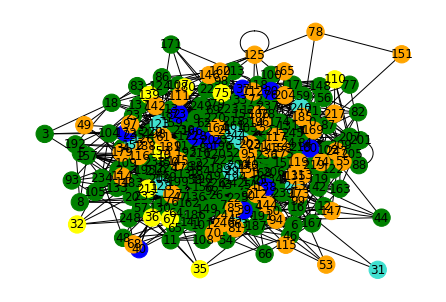

In [30]:
nx.draw(G, with_labels = True, node_color = bettor_df['color'])

In [31]:
bettor_df['color'].values

array(['green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'gre

/var/folders/vh/4g2kk1vs48v4x1jzrcb_11640000gn/T/ipykernel_4555/1723999534.py:3: UserWarning: Legend does not support 'green' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(bettor_df['color'], bettor_df['bettor type'])
/var/folders/vh/4g2kk1vs48v4x1jzrcb_11640000gn/T/ipykernel_4555/1723999534.py:3: UserWarning: Legend does not support 'turquoise' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(bettor_df['color'], bettor_df['bettor type'])
/var/folders/vh/4g2kk1vs48v4x1jzrcb_11640000gn/T/ipykernel_4555/1723999534.py:3: UserWarning: Legend does not support 'yellow' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-a

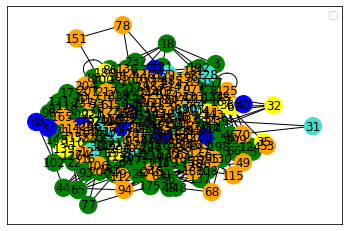

In [32]:
import matplotlib.pyplot as plt
nx.draw_networkx(G, with_labels = True, node_color = bettor_df['color'], label = ['priv', 'rd'])
plt.legend(bettor_df['color'], bettor_df['bettor type'])
plt.show()

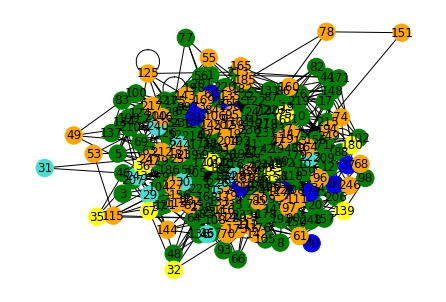

In [33]:
nx.draw(G, with_labels = True, node_color = bettor_df['color'])

In [34]:
from pyvis.network import Network

net = Network(notebook = True)

net.from_nx(G)

net.show('example.html')

In [35]:
# g_labels =  Network(height='600px',width='90%',
#                   bgcolor='white',font_color="red",
#                   heading="A Simple Networkx Graph with Labels")

In [36]:
new_bettor_df
    

,id,shuffled_id,neighbour,color
0,0,0,249,green
1,0,0,245,green
2,0,0,26,green
3,0,0,84,green
4,0,0,88,green
...,...,...,...,...
2351,249,249,195,orange
2352,249,249,123,orange
2353,249,249,139,orange
2354,249,249,188,orange


In [37]:
import numpy as np

unique_ids = np.unique(new_bettor_df['shuffled_id'])

unique_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [38]:
nt = Network(notebook=True)

for i in range(len(unique_ids)):
    #nt.add_node(int(i), label = bettor_df['bettor type'][i], color = bettor_df['color'][i])
    nt.add_node(int(i), label = str(i), color = bettor_df['color'][i])
    
for j in range(len(new_bettor_df)):
    nt.add_edge(int(new_bettor_df['shuffled_id'][j]), int(new_bettor_df['neighbour'][j]), color = 'black')

In [39]:
# nt.nodes

In [40]:
# nt.edges

In [41]:
nt.show('example.html')

In [103]:
# pip install imgkit

In [110]:
pip install --upgrade html2image

Note: you may need to restart the kernel to use updated packages.


In [111]:
from html2image import Html2Image

In [112]:
hti = Html2Image()

In [113]:
hti.screenshot(url='file:///Users/freddielloyd/Documents/Uob%20Documents/DSP%20THESIS/figures/black_edges_pyvis_netw_structure_101010101010.html', save_as='python_org.png')

objc[71727]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5e2acec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.101/Libraries/libGLESv2.dylib (0x110125590). One of the two will be used. Which one is undefined.
[0901/204752.990198:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
[0901/204800.393945:INFO:headless_shell.cc(660)] Written to file /Users/freddielloyd/Documents/Uob Documents/SDPA/Jupyter_Workspace/DSP/python_org.png.


['/Users/freddielloyd/Documents/Uob Documents/SDPA/Jupyter_Workspace/DSP/python_org.png']